## Calibration of lab probe P20 with extension cable

Probe P20 was built to work with Douw's profiler. It has a 20 cm long shaft. We are recalibrating because we are using an extension cable to reach the conduino circuit.

Channel order: CH3 - P20

We ran this calibration in situ with all probes connected (ANK1, ANK2, P20)

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
df = pd.read_csv('../calibration_P20_30apr19/calibration.csv',header=2)
print(df)


    percentage   density       T
0            0  0.997980  20.014
1           10  1.001300  20.025
2           20  1.004050  20.027
3           30  1.007660  20.016
4           40  1.011686  20.000
5           50  1.016300  20.003
6           60  1.019080  20.018
7           70  1.022207  20.000
8           80  1.026701  20.001
9           90  1.028190  20.014
10         100  1.032480  20.016


../calibration_P20_30apr19/00pc.mat
../calibration_P20_30apr19/10pc.mat
../calibration_P20_30apr19/20pc.mat
../calibration_P20_30apr19/30pc.mat
../calibration_P20_30apr19/40pc.mat
../calibration_P20_30apr19/50pc.mat
../calibration_P20_30apr19/60pc.mat
../calibration_P20_30apr19/70pc.mat
../calibration_P20_30apr19/80pc.mat
../calibration_P20_30apr19/90pc.mat
../calibration_P20_30apr19/100pc.mat


Text(0.5,1,'CH2 - P20')

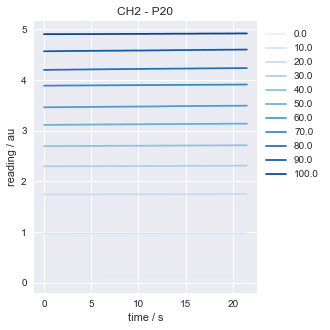

In [5]:
file_num = 11

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

nums = ['100','90','80','70','60','50','40','30','20','10','00']
nums=nums[::-1]

fig, (ax0) = plt.subplots(1,1, figsize=(4,5), sharey=True)

sns.set_palette('Blues', file_num)
for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_P20_30apr19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch2 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    ax0.plot(time,ch2, label='%1.1f' %df.percentage[ii])
    
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax0.set_title('CH2 - P20')


P20
rho_2 = 0.998253+0.000019r+0.002393r^2+-0.000202r^3 



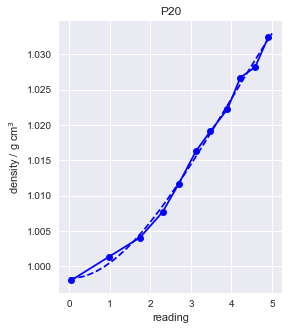

In [13]:
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,5,30)

fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)

fig, (ax1) = plt.subplots(1,1, figsize=(4,5), sharey=True)

ax1.errorbar(mean_read_ch2, df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')


ax1.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax1.set_title('P20')

print('P20')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))


In [14]:
# RMS

check_fit =coef2[0]+(coef2[1]*mean_read_ch2)+(coef2[2]*mean_read_ch2**2) + (coef2[3]*mean_read_ch2**3)
var = np.sum(np.sqrt((df.density-check_fit)**2))/len(check_fit)
print(var)

0.0005916988173632368
